In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import random



In [86]:
# Veri setimizi yükledik

df = pd.read_csv("forbes_2022_billionaires.csv")

In [87]:
# Veri setinin ilk satırlarını görüntülemek için

df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [39]:
# Veri setinin son satırlarını görüntülemek için

df.tail()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
2663,2578,Zhang Yuqiang,66.0,1000.0,2022,4,Manufacturing,Fiberglass,China,NaN,...,NaN,True,M,1955-09-01,NaN,NaN,NaN,NaN,"Zhang Yuqiang chairs Zhenshi Holding Group, a ...",NaN
2664,2578,Zhou Ruxin,59.0,1000.0,2022,4,Technology,Navigation,China,NaN,...,NaN,True,M,1963-03-01,NaN,NaN,NaN,NaN,"Zhou Ruxin chairs Beijing BDStar Navigation, a...",NaN
2665,2578,Wen Zhou & family,57.0,1000.0,2022,4,Manufacturing,chemicals,China,NaN,...,NaN,True,M,1965-03-06,NaN,NaN,NaN,NaN,"Zhou Wen chairs Shanghai Pret Composites, a su...",NaN
2666,2578,Zhou Yifeng & family,43.0,1000.0,2022,4,Energy,liquefied petroleum gas,China,NaN,...,NaN,True,F,1978-07-11,NaN,NaN,NaN,NaN,Zhou Yifeng chairs Shenzhen-listed Oriental En...,NaN
2667,2578,Zhuang Kuilong & family,59.0,1000.0,2022,4,Manufacturing,polyester,China,NaN,...,NaN,True,M,1962-06-15,NaN,NaN,NaN,NaN,"Zhuang Kuilong chairs Xinfengming Group, a man...",NaN


In [40]:
# Satır/sütun sayısı

df.shape

(2668, 22)

In [41]:
# Veri setinin yapısını inceledik

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  2668 non-null   int64  
 1   personName            2668 non-null   object 
 2   age                   2582 non-null   float64
 3   finalWorth            2668 non-null   float64
 4   year                  2668 non-null   int64  
 5   month                 2668 non-null   int64  
 6   category              2668 non-null   object 
 7   source                2668 non-null   object 
 8   country               2655 non-null   object 
 9   state                 748 non-null    object 
 10  city                  2624 non-null   object 
 11  countryOfCitizenship  2668 non-null   object 
 12  organization          352 non-null    object 
 13  selfMade              2668 non-null   bool   
 14  gender                2652 non-null   object 
 15  birthDate            

In [42]:
# Sütunların isimlerini görüntülemek için

df.columns

Index(['rank', 'personName', 'age', 'finalWorth', 'year', 'month', 'category',
       'source', 'country', 'state', 'city', 'countryOfCitizenship',
       'organization', 'selfMade', 'gender', 'birthDate', 'title',
       'philanthropyScore', 'residenceMsa', 'numberOfSiblings', 'bio',
       'about'],
      dtype='object')

In [43]:
# Loc metodu ile istediğimiz sütunları seçtik

df = df.loc[:,["rank","personName","age","finalWorth","category","country","gender"]]
df.head()

,rank,personName,age,finalWorth,category,country,gender
0,1,Elon Musk,50.0,219000.0,Automotive,United States,M
1,2,Jeff Bezos,58.0,171000.0,Technology,United States,M
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
3,4,Bill Gates,66.0,129000.0,Technology,United States,M
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


In [44]:
# Sıra sütununu index haline getirdik

df = df.set_index("rank")

In [45]:
df.head()

,personName,age,finalWorth,category,country,gender
rank,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M
2,Jeff Bezos,58.0,171000.0,Technology,United States,M
3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
4,Bill Gates,66.0,129000.0,Technology,United States,M
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


In [46]:
# Veri setindeki sütunların tipini inceledik

df.dtypes

personName     object
age           float64
finalWorth    float64
category       object
country        object
gender         object
dtype: object

In [47]:
# Veri setindeki eksik verileri görüntüledik

df.isnull().sum()

personName     0
age           86
finalWorth     0
category       0
country       13
gender        16
dtype: int64

In [48]:
# Eksik veri içeren satırları veri setinden çıkardık (dropna metodu)
# Yapılan değişiklerin kaydedilmesi için (inplace) fonk. kullandık

df.dropna(inplace = True)

In [49]:
# Satır sayısı azaldı

df.shape

(2568, 6)

In [50]:
# Kategorilemizin sayısını görmek için

df["category"].value_counts()

Finance & Investments         381
Technology                    332
Manufacturing                 319
Fashion & Retail              238
Healthcare                    209
Food & Beverage               193
Real Estate                   187
Diversified                   174
Media & Entertainment          95
Energy                         93
Automotive                     66
Metals & Mining                65
Service                        52
Construction & Engineering     45
Telecom                        37
Logistics                      32
Sports                         27
Gambling & Casinos             23
Name: category, dtype: int64

In [16]:
# Cinsiyet sütunundaki kategorilerimizin sayısı

df["gender"].value_counts()

M    2282
F     286
Name: gender, dtype: int64

In [17]:
# Milyarder kadın ve erkek sayılarının yüzdesi

df["gender"].value_counts(normalize = True)

M    0.888629
F    0.111371
Name: gender, dtype: float64

In [19]:
# Veri setindeki ülkeler

df["country"].unique()

array(['United States', 'France', 'India', 'Mexico', 'China', 'Singapore',
       'Spain', 'Canada', 'Germany', 'Switzerland', 'Belgium',
       'Hong Kong', 'United Kingdom', 'Australia', 'Austria', 'Italy',
       'Japan', 'Bahamas', 'Indonesia', 'Chile', 'Russia', 'Sweden',
       'Czechia', 'Monaco', 'United Arab Emirates', 'Nigeria', 'Denmark',
       'Thailand', 'Malaysia', 'Brazil', 'Colombia', 'New Zealand',
       'South Korea', 'South Africa', 'Philippines', 'Egypt', 'Taiwan',
       'Israel', 'Vietnam', 'Poland', 'Norway', 'Cayman Islands',
       'Netherlands', 'Eswatini (Swaziland)', 'Peru', 'Algeria',
       'Kazakhstan', 'Georgia', 'Portugal', 'British Virgin Islands',
       'Turkey', 'Finland', 'Ukraine', 'Ireland', 'Bermuda', 'Lebanon',
       'Argentina', 'Cambodia', 'Oman', 'Guernsey', 'Liechtenstein',
       'Turks and Caicos Islands', 'Qatar', 'Morocco', 'Uruguay',
       'Slovakia', 'Romania', 'Nepal', 'Tanzania', 'Bahrain', 'Greece',
       'Hungary', 'Andorra']

In [65]:
# Türkiye'deki milyarder kadın ve erkek sayılarının yüzdesi

df[df["country"]== "Turkey"].gender.value_counts(normalize = True)

M    0.826087
F    0.173913
Name: gender, dtype: float64

In [20]:
df[df["country"]== "United States"].gender.value_counts(normalize = True)

M    0.881402
F    0.118598
Name: gender, dtype: float64

In [21]:
df[df["country"]== "China"].gender.value_counts(normalize = True)

M    0.913919
F    0.086081
Name: gender, dtype: float64

In [22]:
df[df["country"]== "Egypt"].gender.value_counts(normalize = True)

M    1.0
Name: gender, dtype: float64

In [23]:
df[df["country"]== "Sweden"].gender.value_counts(normalize = True)

M    0.8125
F    0.1875
Name: gender, dtype: float64

In [24]:
df[df["country"]== "Canada"].gender.value_counts(normalize = True)

M    0.952381
F    0.047619
Name: gender, dtype: float64

In [64]:
# Veri setini cinsiyete göre gruplandır

df_gender = df.groupby(["gender"])

In [26]:
# Yaş ortalamaları
df_gender["age"].mean()

gender
F    62.937063
M    64.409290
Name: age, dtype: float64

In [27]:
df[df["category"]== "Finance & Investments"].gender.value_counts(normalize = True)

M    0.937008
F    0.062992
Name: gender, dtype: float64

In [28]:
df[df["category"]== "Technology"].gender.value_counts(normalize = True)

M    0.918675
F    0.081325
Name: gender, dtype: float64

In [29]:
df[df["category"]== "Healthcare"].gender.value_counts(normalize = True)

M    0.856459
F    0.143541
Name: gender, dtype: float64

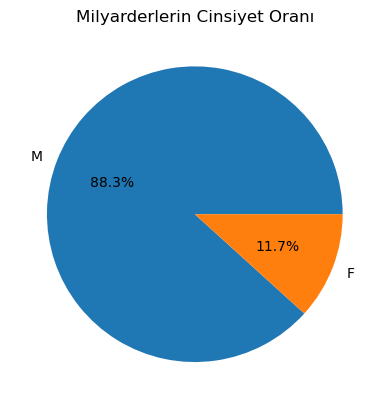

In [65]:
# Cinsiyet oranlarını hesapla
gender_counts = df["gender"].value_counts()

# Pasta grafiği oluştur
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Milyarderlerin Cinsiyet Oranı")
plt.show()

In [35]:
df_category = df.groupby("category").size()
df_category.head()

category
Automotive                     66
Construction & Engineering     45
Diversified                   174
Energy                         93
Fashion & Retail              238
dtype: int64

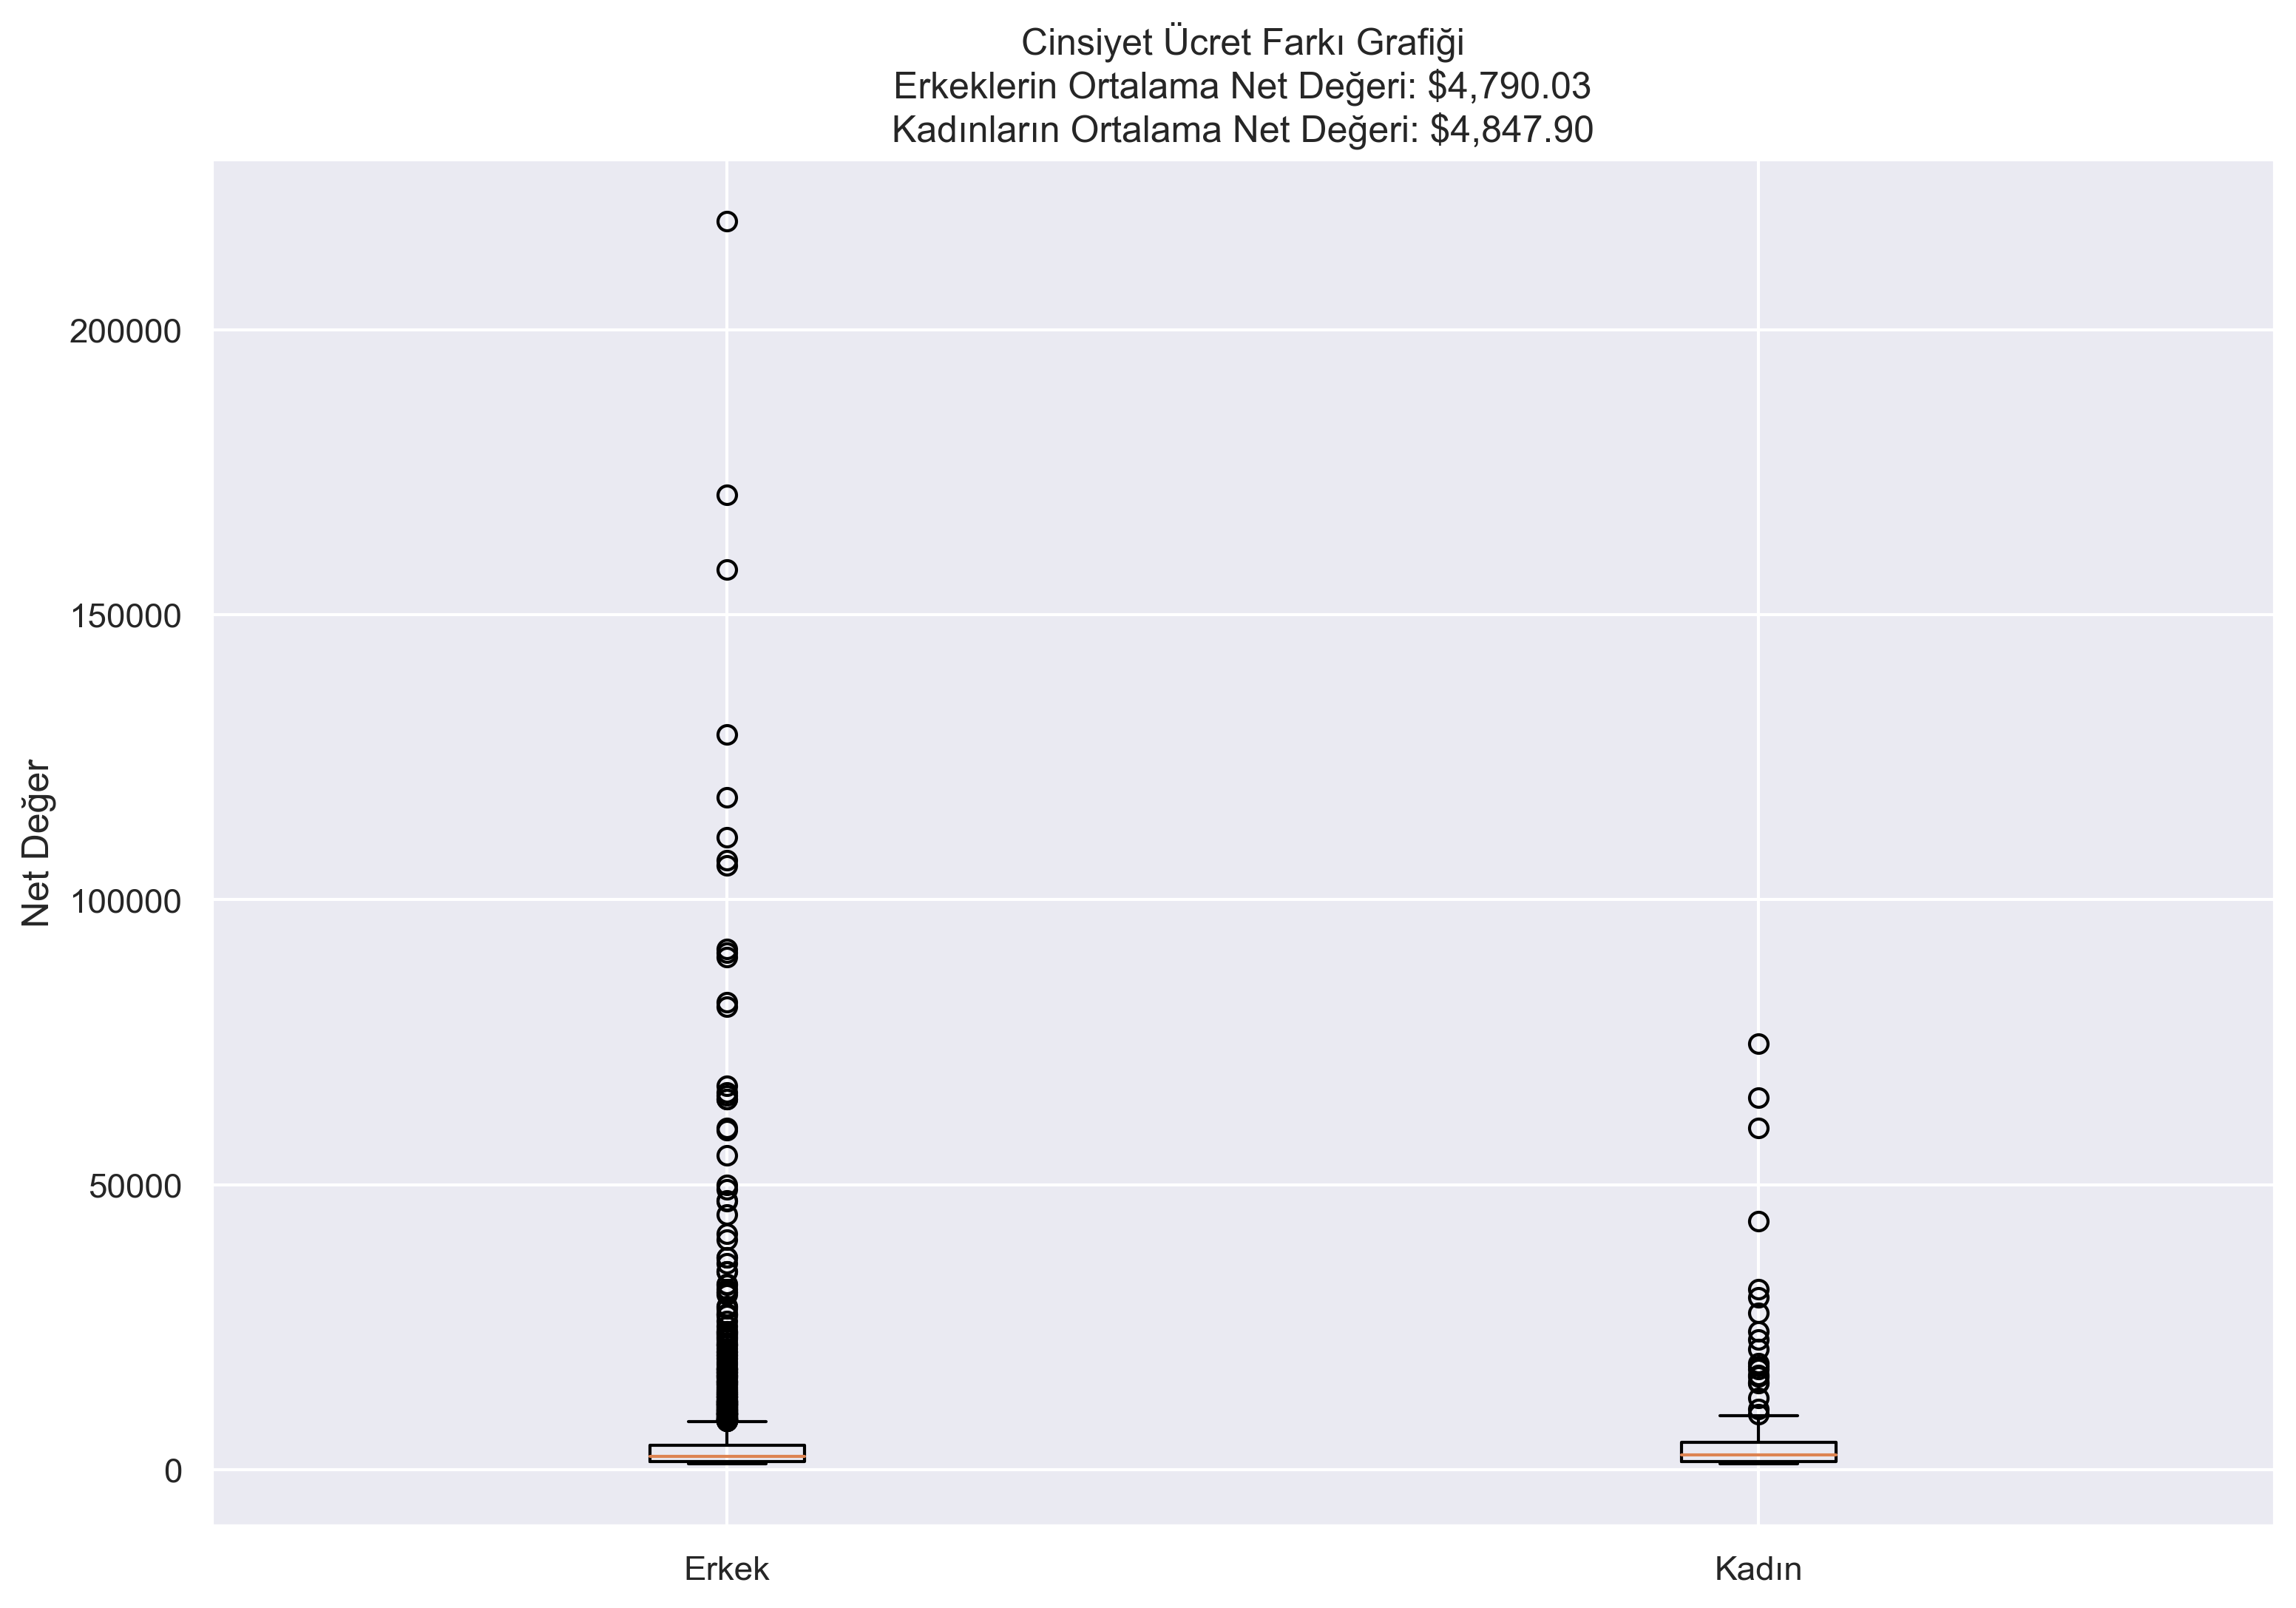

In [37]:
# Erkek milyarderlerin ortalama net değeri
male_mean = df[df.gender == 'M']['finalWorth'].mean()

# Kadın milyarderlerin ortalama net değeri
female_mean = df[df.gender == 'F']['finalWorth'].mean()

# Cinsiyetlere göre verileri ayırma
male_data = df[df.gender == 'M']['finalWorth']
female_data = df[df.gender == 'F']['finalWorth']

# Kutu grafiği oluşturma
data = [male_data, female_data]
fig, ax = plt.subplots()
ax.boxplot(data)

# Grafiği özelleştirme
ax.set_xticklabels(['Erkek', 'Kadın'])
ax.set_ylabel('Net Değer')
ax.set_title('Cinsiyet Ücret Farkı Grafiği\nErkeklerin Ortalama Net Değeri: ${:,.2f}\nKadınların Ortalama Net Değeri: ${:,.2f}'.format(male_mean, female_mean))

# Grafiği gösterme
plt.show()

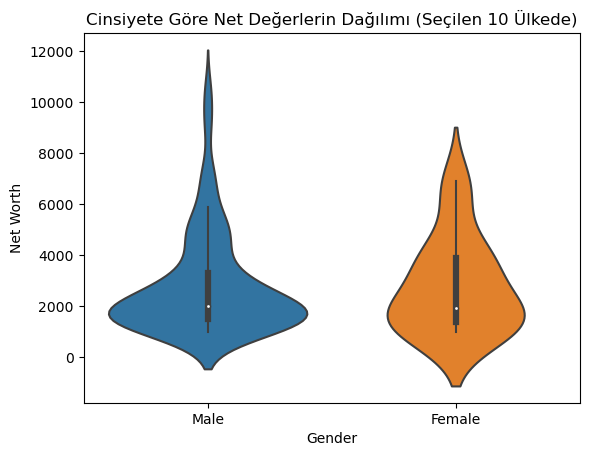

In [71]:
df = pd.read_csv("forbes_2022_billionaires.csv")
import random

# Random 10 ülke seçmek
countries = df['country'].unique().tolist()
selected_countries = random.sample(countries, k=10)

# Seçilen ülkelerdeki erkek ve kadın milyarderlerin net değerlerini almak
male_net_worth = []
female_net_worth = []
for country in selected_countries:
    male_worth = df[(df['country'] == country) & (df['gender'] == 'M')]['finalWorth'].values
    female_worth = df[(df['country'] == country) & (df['gender'] == 'F')]['finalWorth'].values
    male_net_worth.extend(male_worth)
    female_net_worth.extend(female_worth)

# Verileri birleştirme
df_combined = pd.DataFrame({
    'Gender': ['Male']*len(male_net_worth) + ['Female']*len(female_net_worth),
    'Net Worth': male_net_worth + female_net_worth
})

# Grafik oluşturma
sns.violinplot(x='Gender', y='Net Worth', data=df_combined)
plt.title('Cinsiyete Göre Net Değerlerin Dağılımı (Seçilen 10 Ülkede)')
plt.show()

In [88]:
# Kadın milyarderlerin ülkelere göre dağılımını gösteren grafik

import plotly.express as px
import pycountry

# Verileri oku
df = pd.read_csv("forbes_2022_billionaires.csv")

# İhtiyacımız olan sütunları seç
df = df.loc[:,["rank","personName","age","finalWorth","category","country","gender"]]

# Ülke adlarını standartlaştır
def standardize_country(name):
    try:
        return pycountry.countries.lookup(name).name
    except:
        return name

df["country"] = df["country"].apply(standardize_country)

# Yalnızca kadın milyarderlerle yeni bir DataFrame oluştur
female_df = df[df["gender"] == "F"]

# Ülkeye göre grupla ve her ülkedeki kadın milyarder sayısını say
counts_df = female_df.groupby("country")["personName"].count().reset_index()

# Sayı sütununu yeniden adlandır
counts_df.rename(columns={"personName": "count"}, inplace=True)

# Dünya haritasını oluştur
fig = px.choropleth(counts_df, locations="country", locationmode='country names', color="count", hover_name="country",
                    projection="natural earth", title="Distribution of Female Billionaires in 2022")
fig.show()

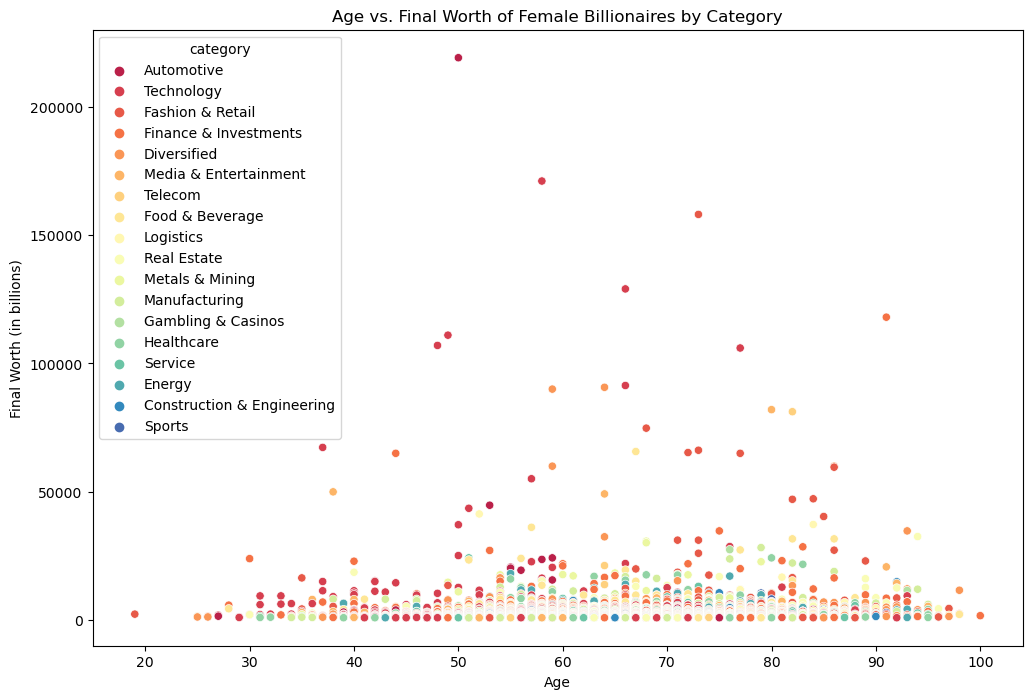

In [23]:
# Kadın Milyarderlerin Yaş ve Nihai Değerini gösteren grafik
plt.figure(figsize=(12,8))
sns.scatterplot(x='age', y='finalWorth', data=df, hue='category', palette='Spectral')
plt.xlabel('Age')
plt.ylabel('Final Worth (in billions)')
plt.title('Age vs. Final Worth of Female Billionaires by Category')
plt.show()

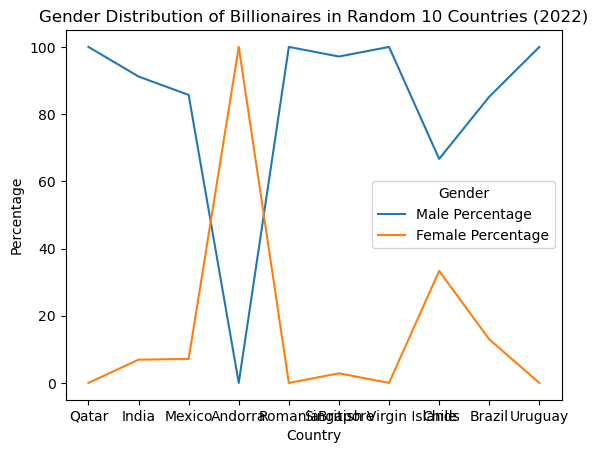

In [73]:
# Rastgele 10 ülke seçimi
random_countries = random.sample(list(df["country"].unique()), 10)

# Seçilen ülkelerdeki milyarderlerin cinsiyet dağılımını hesaplayın
country_gender_counts = []
for country in random_countries:
    billionaires = df[df["country"] == country]["personName"].count()
    male_count = df[(df["country"] == country) & (df["gender"] == "M")]["personName"].count()
    female_count = df[(df["country"] == country) & (df["gender"] == "F")]["personName"].count()
    male_percentage = (male_count / billionaires) * 100
    female_percentage = (female_count / billionaires) * 100
    country_gender_counts.append((country, male_percentage, female_percentage))

# Çizgi grafiği oluşturma
df_country_gender_counts = pd.DataFrame(country_gender_counts, columns=["Country", "Male Percentage", "Female Percentage"])
df_country_gender_counts = df_country_gender_counts.melt(id_vars=["Country"], var_name="Gender", value_name="Percentage")
sns.lineplot(x="Country", y="Percentage", hue="Gender", data=df_country_gender_counts)
plt.title("Gender Distribution of Billionaires in Random 10 Countries (2022)")
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.show()

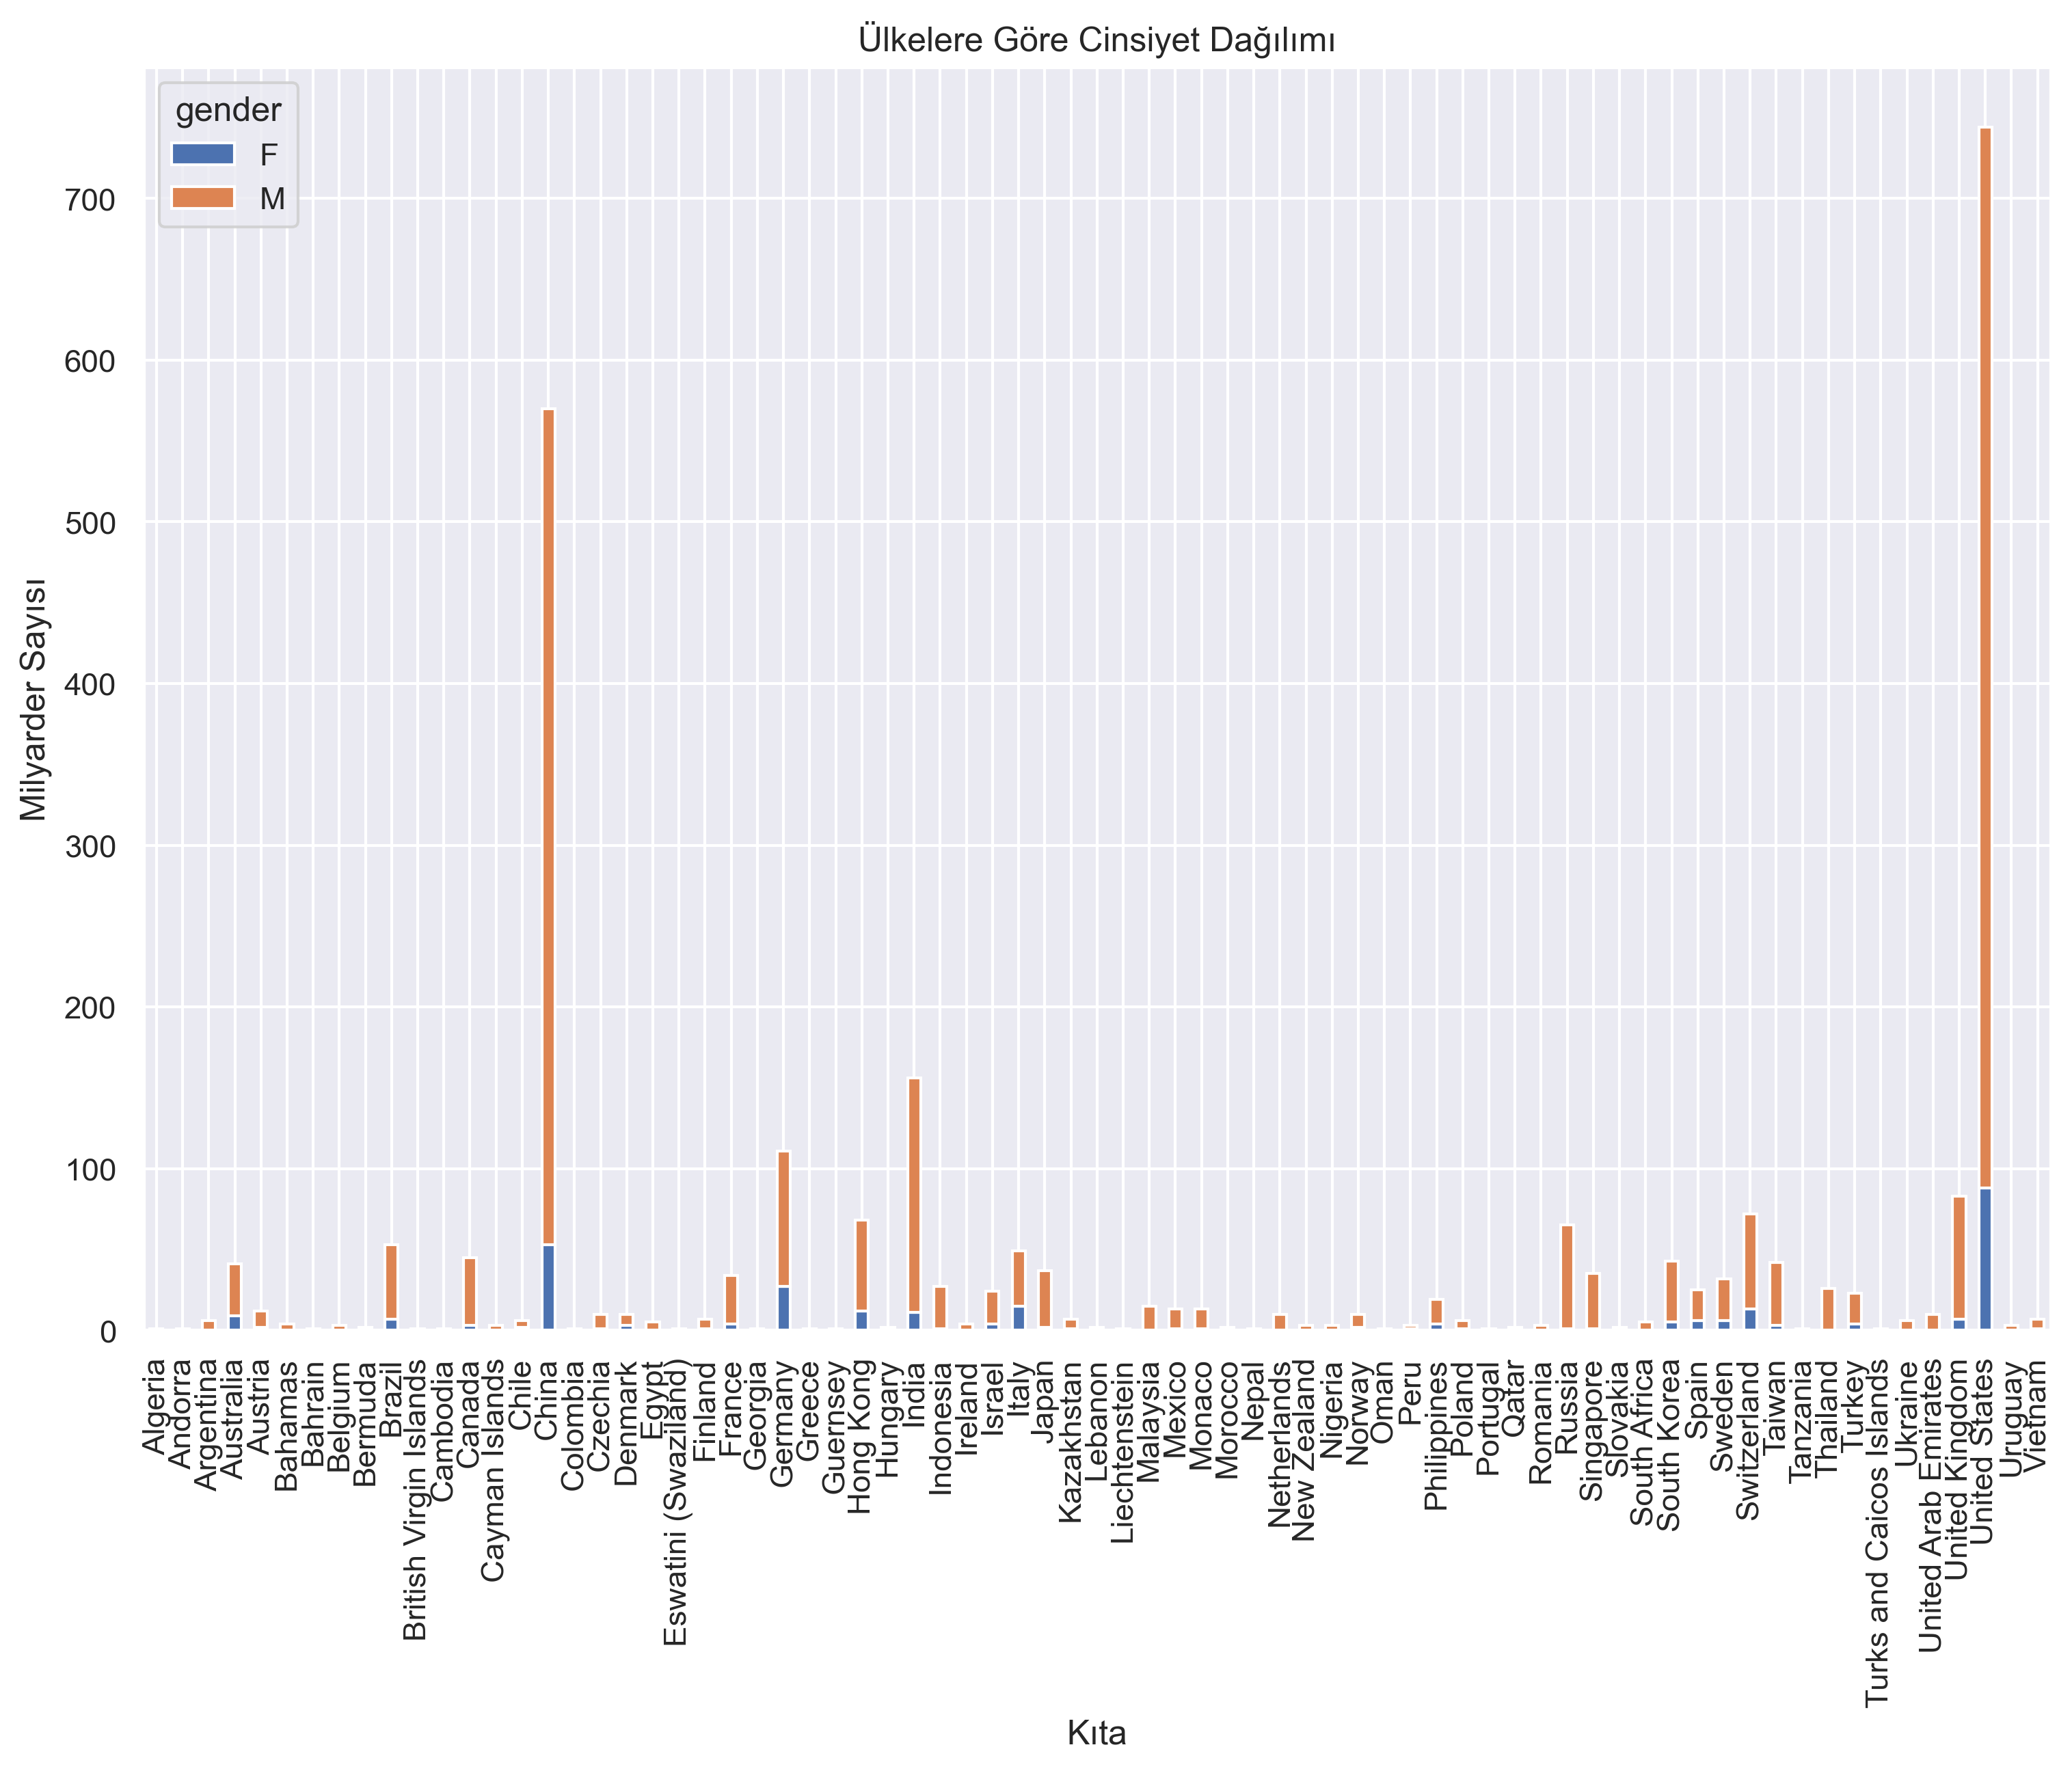

In [54]:
# Ülkelere göre cinsiyet dağılımını hesapla
gender_by_continent = df.groupby(["country", "gender"])["personName"].count().unstack()

# Kadın-erkek oranı grafiğini çizdir
gender_by_continent.plot(kind="bar", stacked=True)

# Eksen ve başlık ayarları
plt.xlabel("Kıta")
plt.ylabel("Milyarder Sayısı")
plt.title("Ülkelere Göre Cinsiyet Dağılımı")

# Grafiği göster
plt.show()

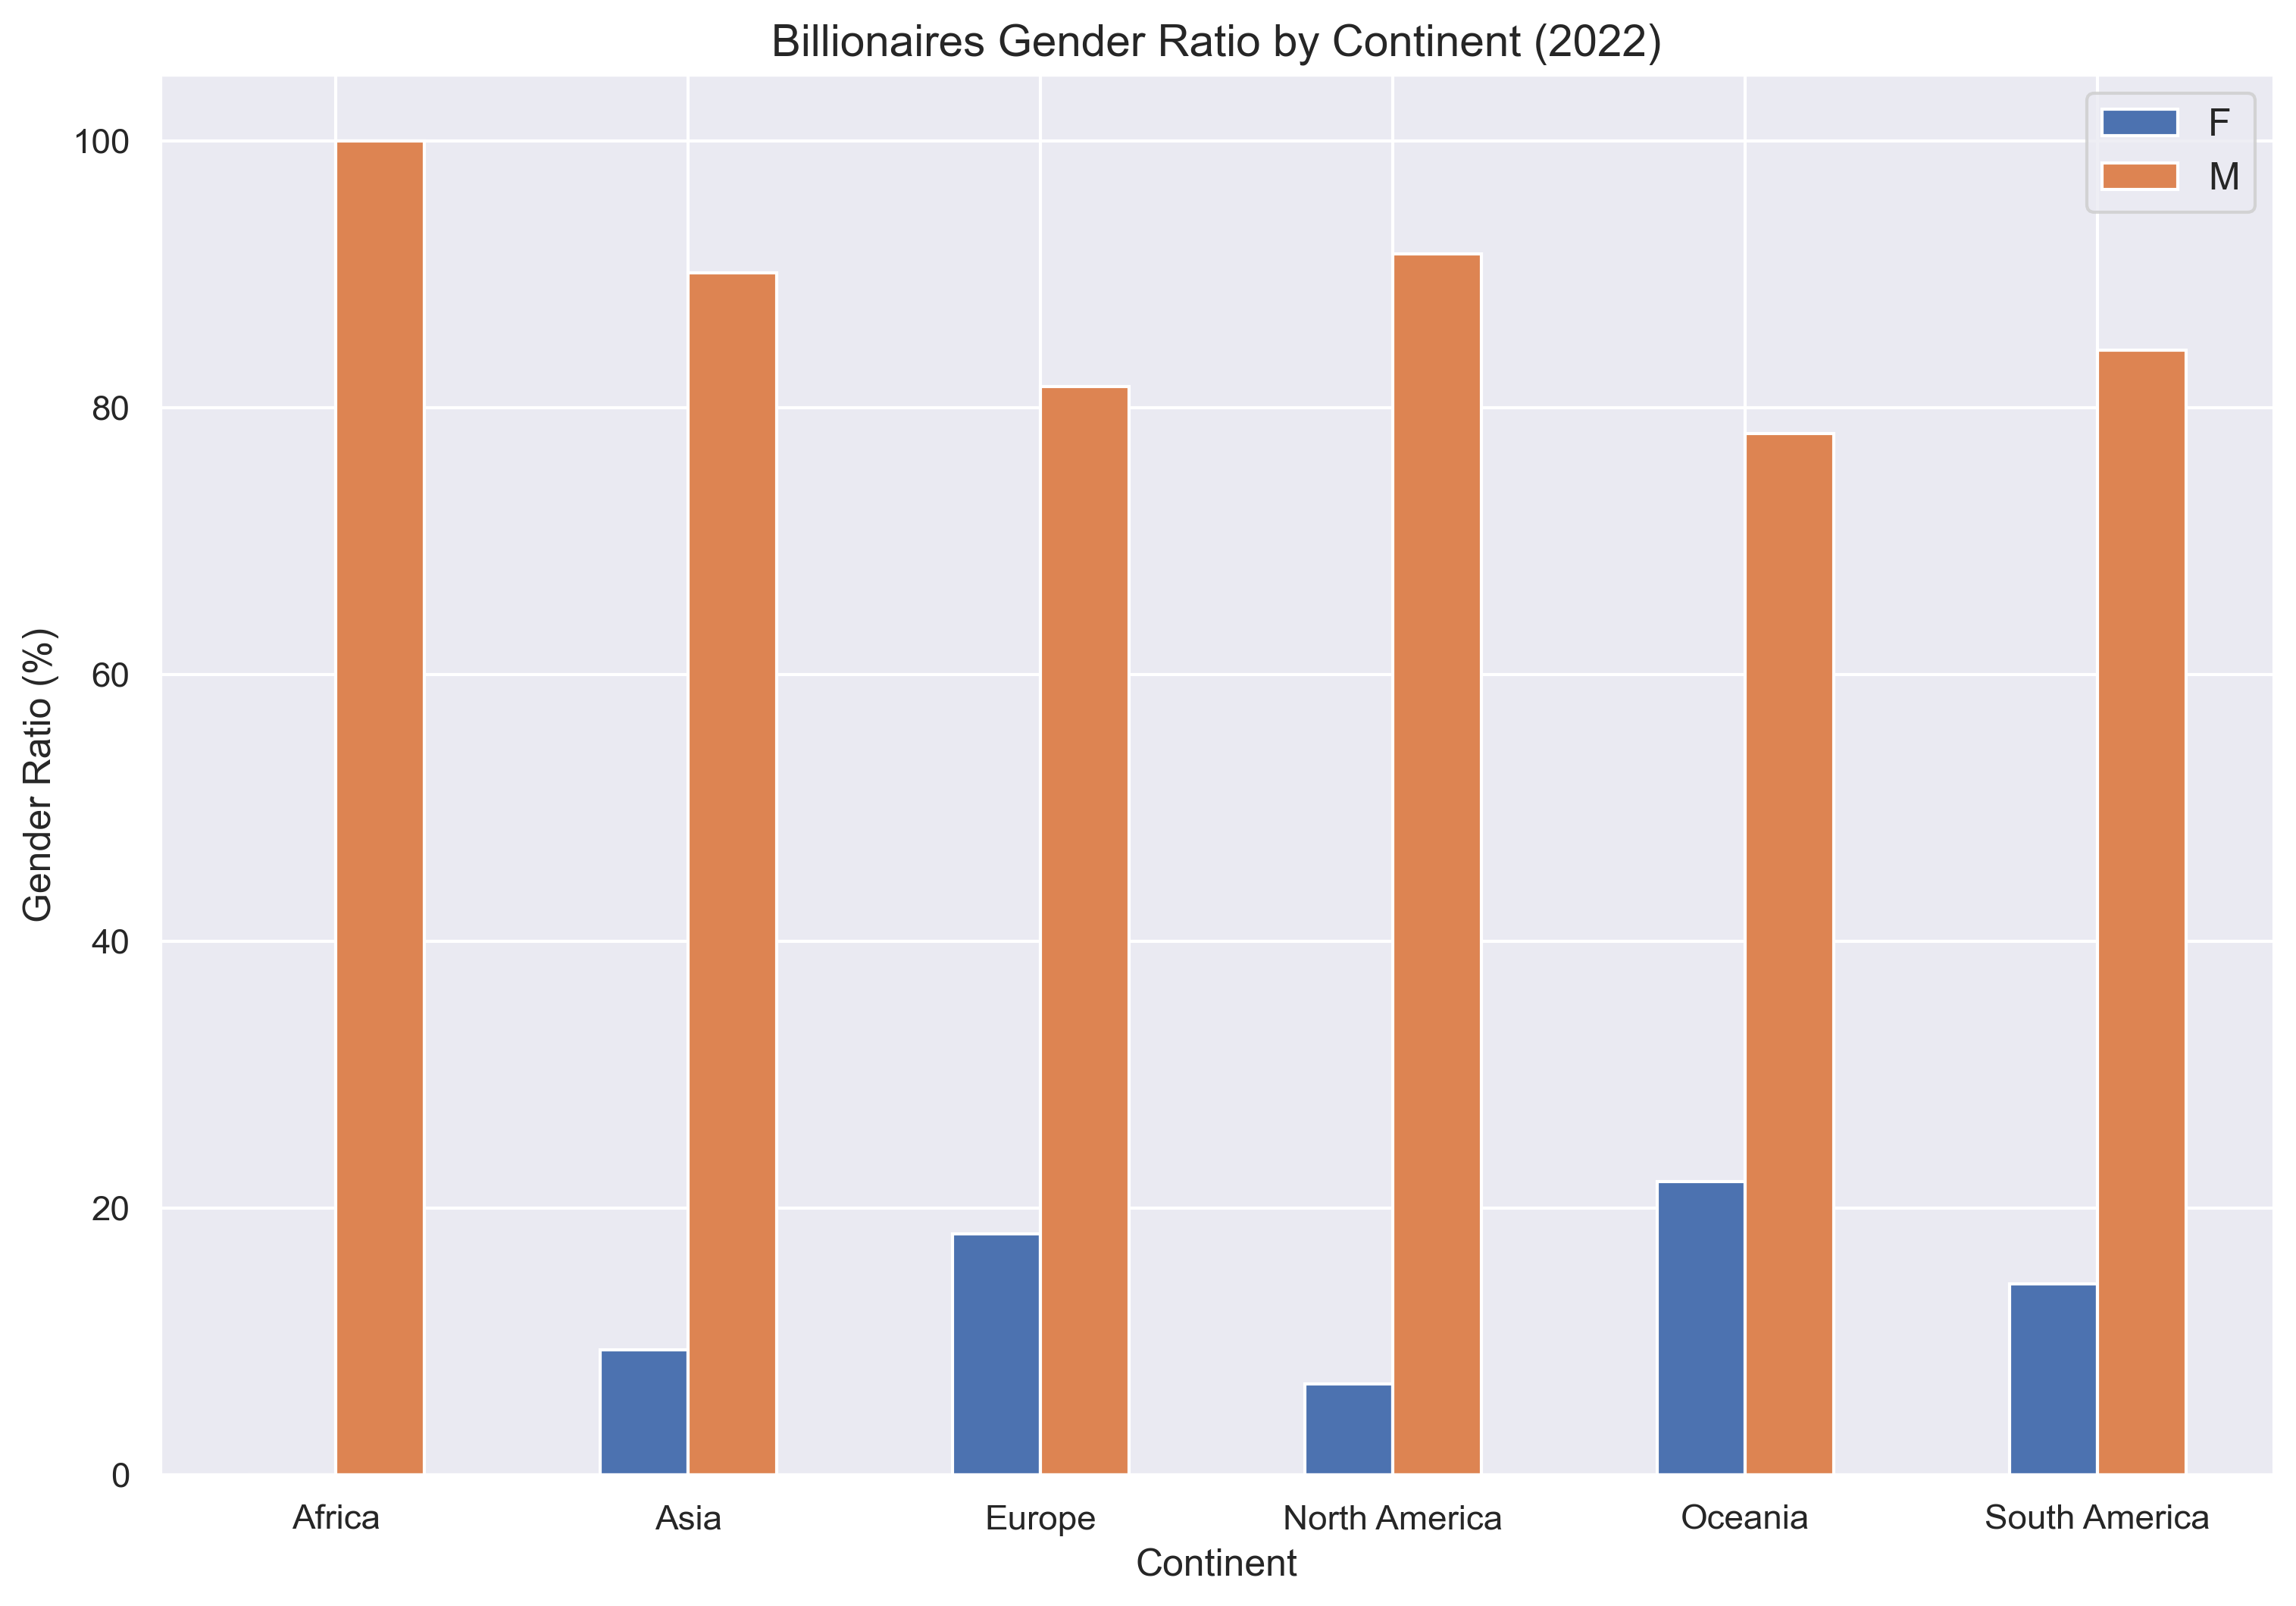

In [78]:
# Milyarderlerin cinsiyet oranlarını kıta bazında gösteren grafik

continents = {
    'Asia': ['China', 'India', 'Hong Kong', 'Japan', 'South Korea', 'Taiwan'],
    'Europe': ['Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Russia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'UK'],
    'North America': ['Canada', 'Mexico', 'USA'],
    'South America': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Peru'],
    'Africa': ['Egypt', 'Morocco', 'Nigeria', 'South Africa'],
    'Oceania': ['Australia']
}

def group_by_continent(country):
    for continent, countries in continents.items():
        if country in countries:
            return continent
    return None

df['continent'] = df['country'].apply(group_by_continent)

billionaire_counts = df['continent'].value_counts()

gender_counts = df.groupby('continent')['gender'].value_counts().unstack()

gender_ratios = gender_counts.divide(billionaire_counts, axis=0) * 100

ax = gender_ratios.plot(kind='bar', rot=0)

ax.set_title('Billionaires Gender Ratio by Continent (2022)', fontsize=14)
ax.set_xlabel('Continent', fontsize=12)
ax.set_ylabel('Gender Ratio (%)', fontsize=12)
ax.legend(fontsize=12)

plt.show()



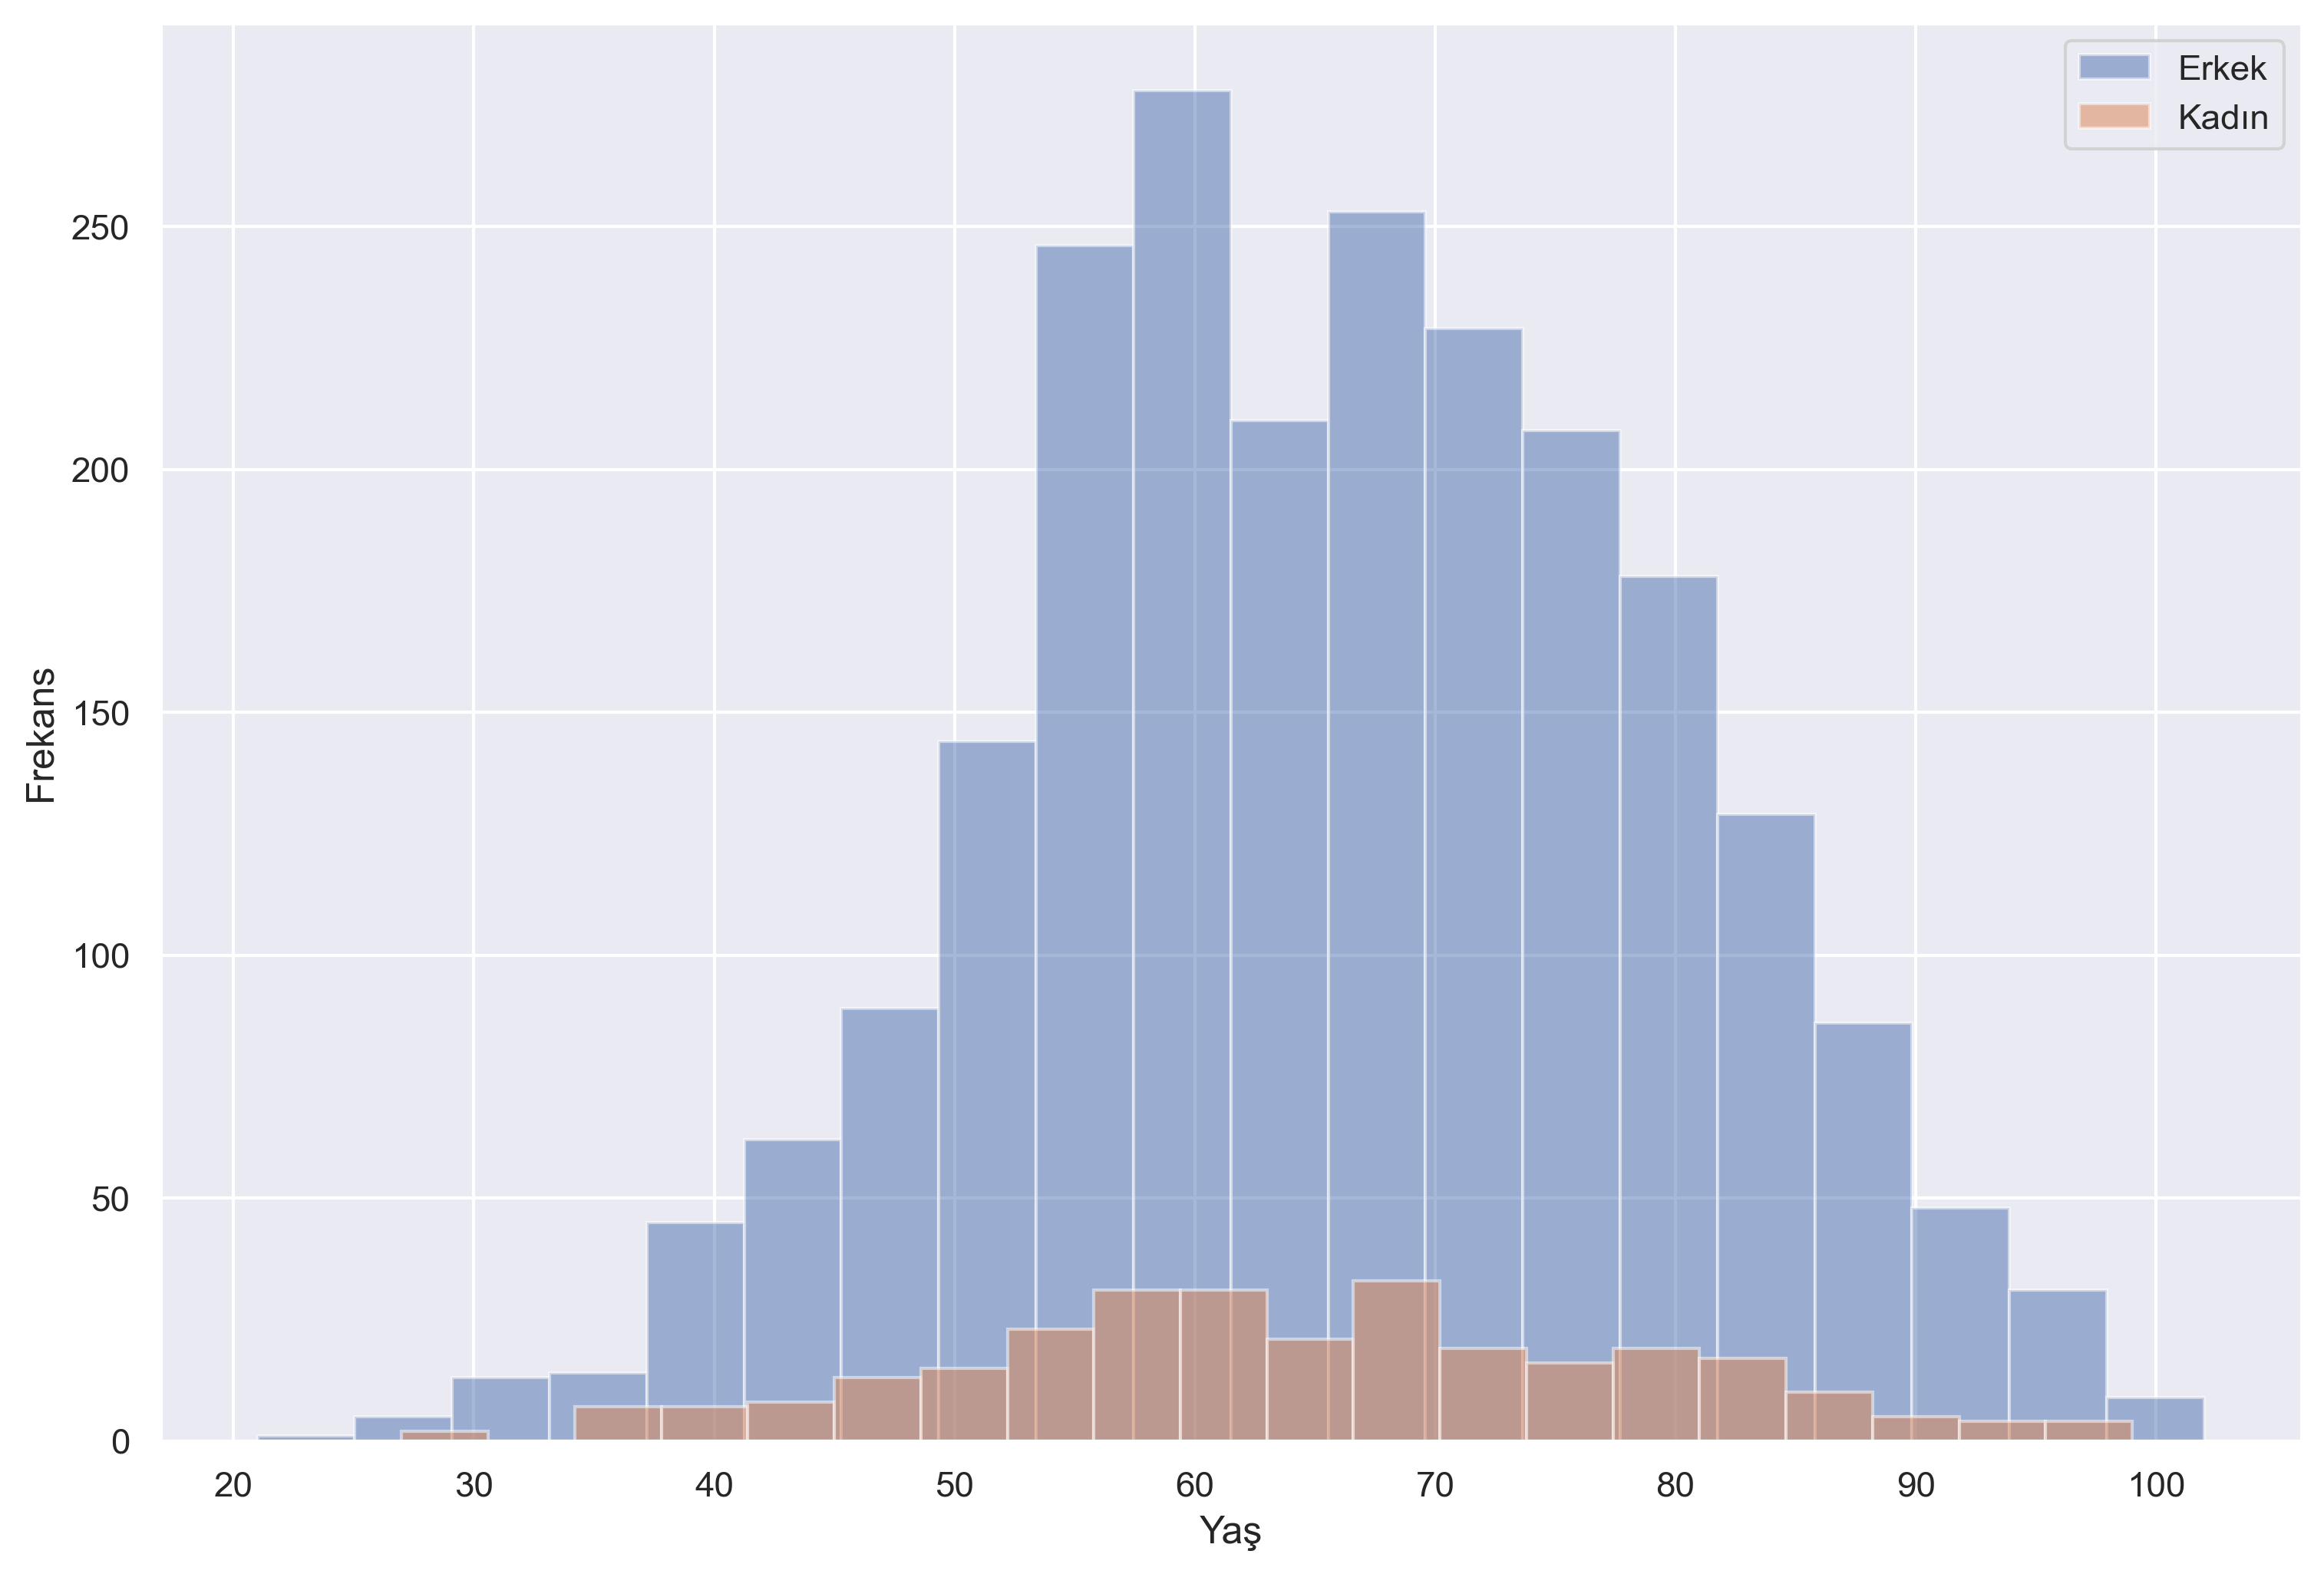

In [61]:
# Milyarderlerin yaşlarını cinsiyete göre karşılaştırarak oluşturulan histogram grafiği

plt.hist(df[df["gender"]=="M"]["age"], bins=20, alpha=0.5, label="Erkek")
plt.hist(df[df["gender"]=="F"]["age"], bins=20, alpha=0.5, label="Kadın")
plt.legend(loc='upper right')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show()